In [76]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [130]:
articles = pd.read_csv('articles.csv',dtype={'article_id': str})

In [162]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [163]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  object
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

**<span style="color:#023e8a;"> This table contains all h&m articles with details such as a type of product, a color, a product group and other features.</span>**  
**<span style="color:#023e8a;"> Article data description: </span>**

> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article.</span>**  
> `product_code`, `prod_name` **<span style="color:#023e8a;">: A unique identifier of every product and its name (not the same).</span>**  
> `product_type`, `product_type_name` **<span style="color:#023e8a;">: The group of product_code and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `colour_group_code`, `colour_group_name` **<span style="color:#023e8a;">: The group of color and its name</span>**  
> `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name` **<span style="color:#023e8a;">: The added color info</span>**  
> `department_no`, `department_name`: **<span style="color:#023e8a;">: A unique identifier of every dep and its name</span>**  
> `index_code`, `index_name`: **<span style="color:#023e8a;">: A unique identifier of every index and its name</span>**  
> `index_group_no`, `index_group_name`: **<span style="color:#023e8a;">: A group of indeces and its name</span>**  
> `section_no`, `section_name`: **<span style="color:#023e8a;">: A unique identifier of every section and its name</span>**  
> `garment_group_no`, `garment_group_name`: **<span style="color:#023e8a;">: A unique identifier of every garment and its name</span>**  
> `detail_desc`: **<span style="color:#023e8a;">: Details</span>**  

In [164]:
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [165]:
# Remove useless columns and other with same unique counts within the same group, if not the same, choose the greater one
df = articles[['article_id', 'product_code', 'product_type_name', 'product_group_name',
               'graphical_appearance_name', 'colour_group_name','department_no', 
               'index_name','index_group_name','section_name','garment_group_name']]

In [166]:
df.nunique()

article_id                   105542
product_code                  47224
product_type_name               131
product_group_name               19
graphical_appearance_name        30
colour_group_name                50
department_no                   299
index_name                       10
index_group_name                  5
section_name                     56
garment_group_name               21
dtype: int64

In [167]:
df.head()

,article_id,product_code,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_no,index_name,index_group_name,section_name,garment_group_name
0,0108775015,108775,Vest top,Garment Upper body,Solid,Black,1676,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
1,0108775044,108775,Vest top,Garment Upper body,Solid,White,1676,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
2,0108775051,108775,Vest top,Garment Upper body,Stripe,Off White,1676,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
3,0110065001,110065,Bra,Underwear,Solid,Black,1339,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
4,0110065002,110065,Bra,Underwear,Solid,White,1339,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"


# EDA

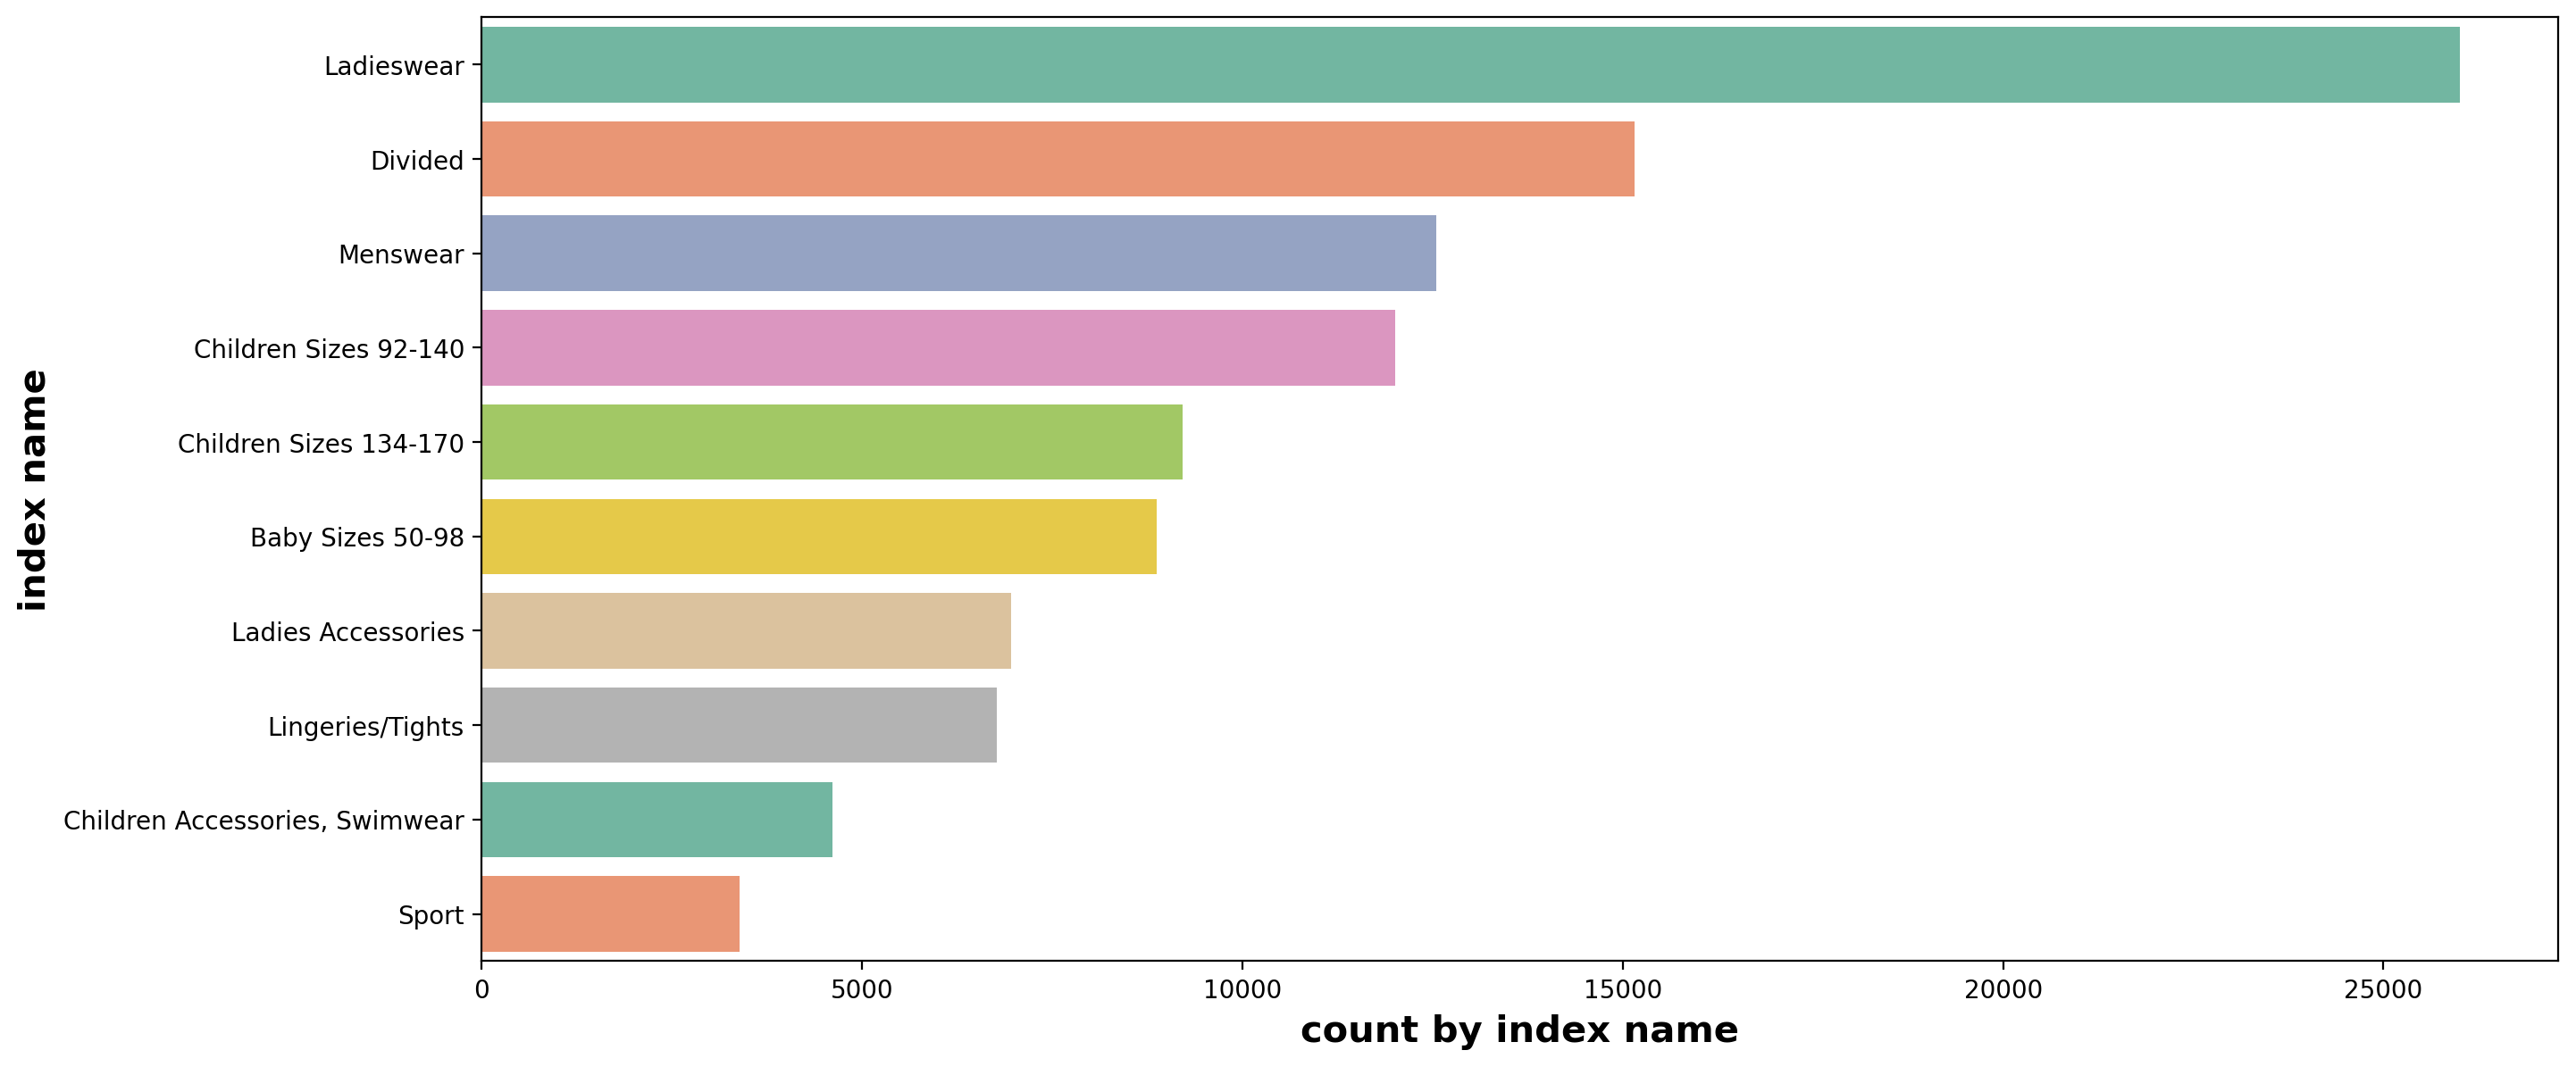

In [168]:
f, ax = plt.subplots(figsize=(15, 7),dpi=200)
ax = sns.countplot(data=df, y='index_name', order = df['index_name'].value_counts().index, 
                   palette = 'Set2')
ax.set_xlabel('count by index name',fontsize=15,fontweight='bold')
ax.set_ylabel('index name',fontsize=15,fontweight='bold');

**Explaination:**
1. Ladieswear absoutialy has the most indexes
2. Menswear is less the Divided
3. Sportswear has the least portion, which makes sense since H&M is a fashion brand|

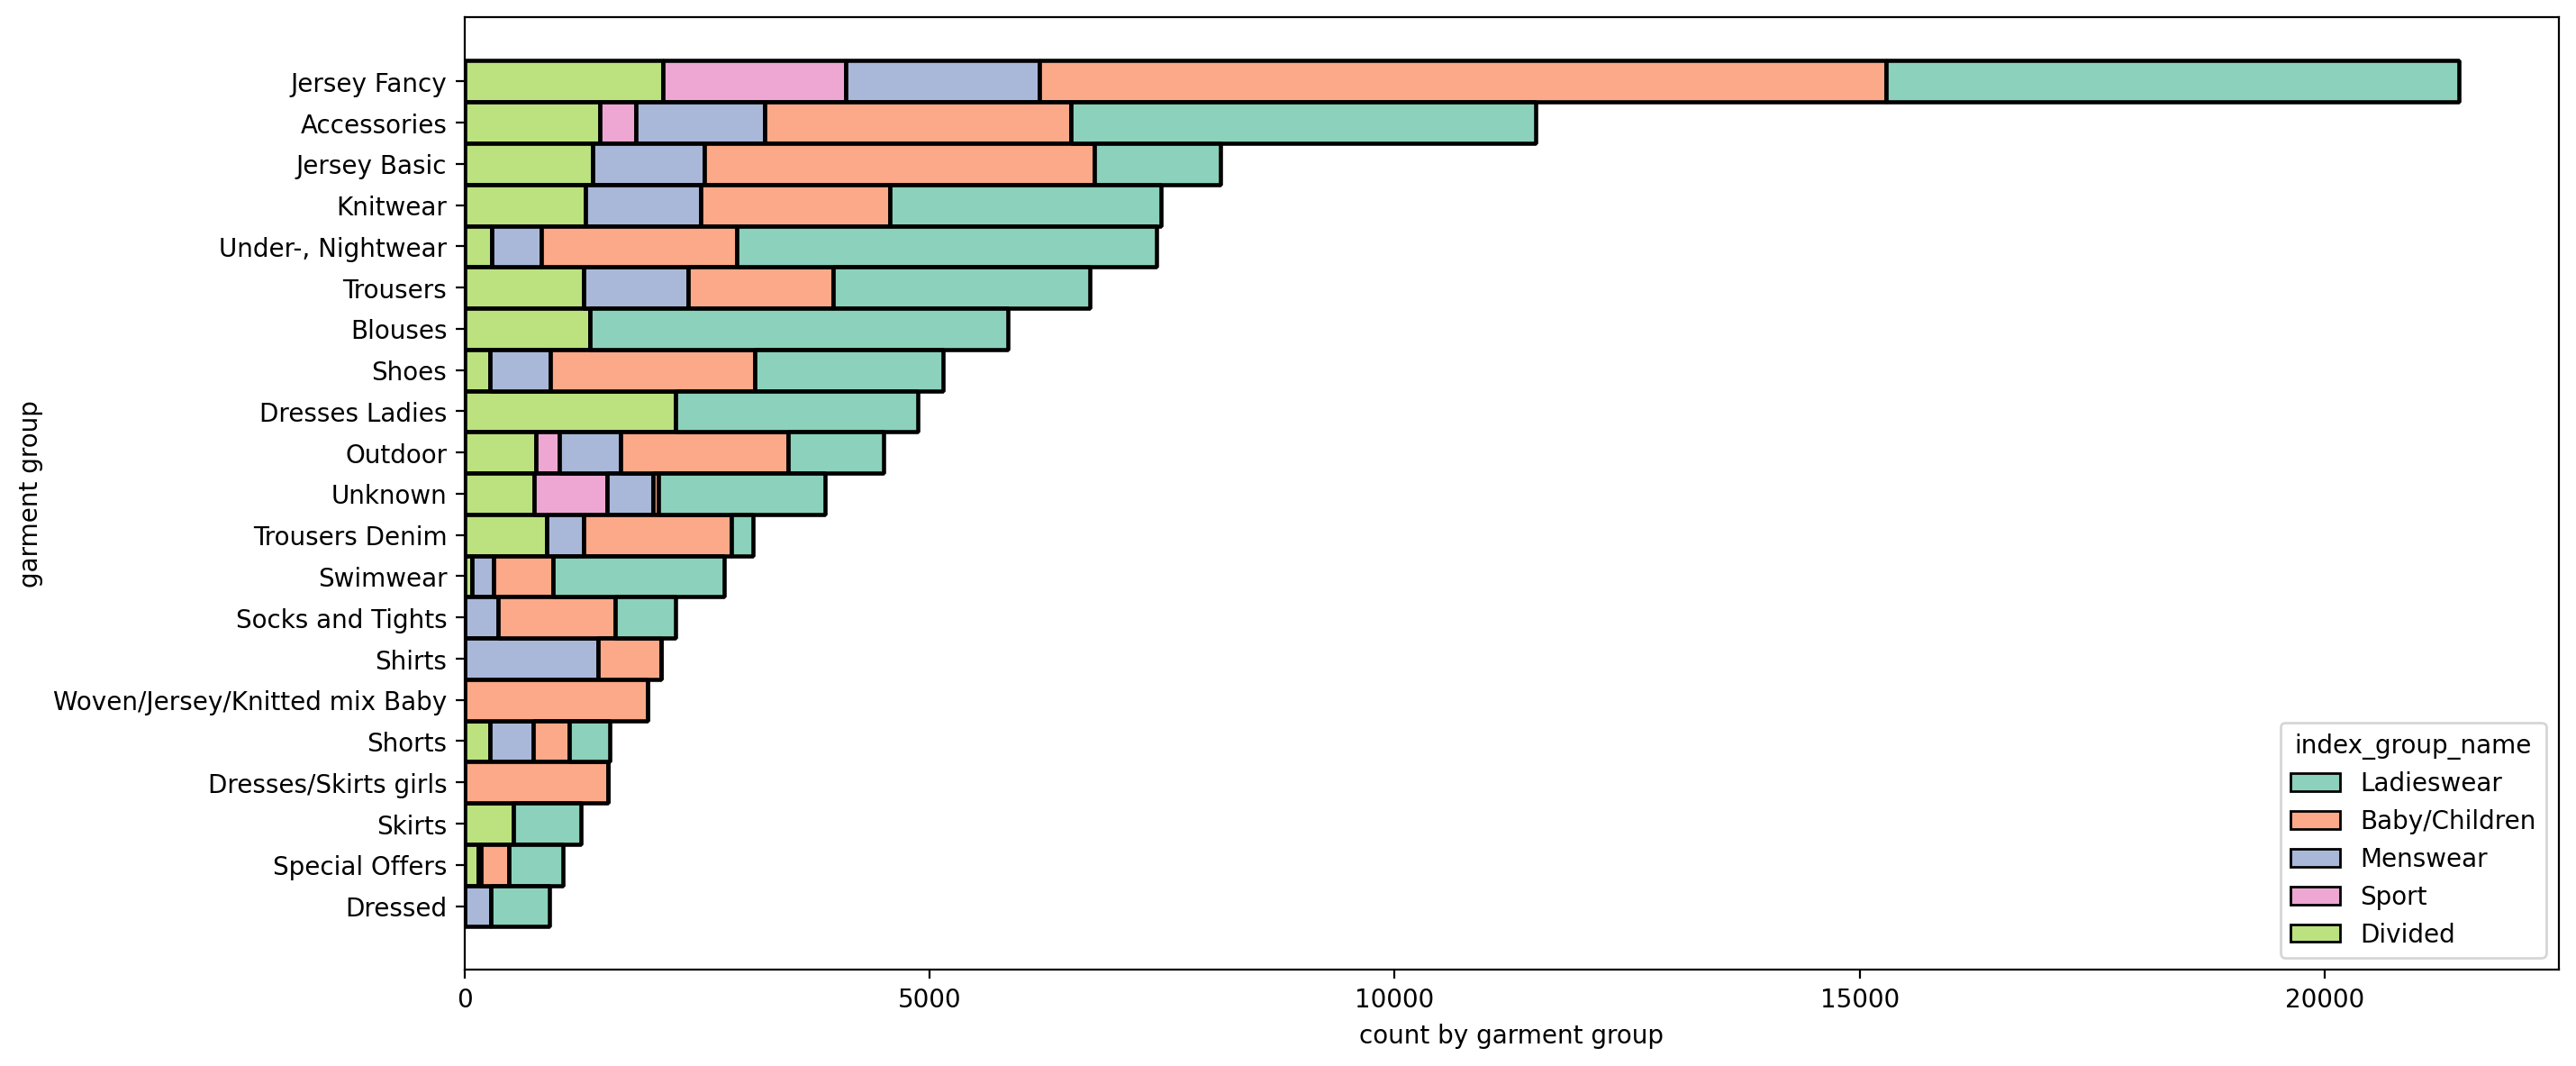

In [169]:
l = list(df['garment_group_name'].value_counts().index)
df['garment_group_name'] = pd.Categorical(df['garment_group_name'], l)

f, ax = plt.subplots(figsize=(15, 7),dpi=200)
ax = sns.histplot(data=df, y='garment_group_name', 
                  hue='index_group_name', multiple="stack", palette = 'Set2')
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

**Explaination**
1. Jersey Fancy is the biggest portion of garment group, ladieswear and baby/childre are the top 2 within it
2. Many different kinds of accessories
3. Menswear is a small portion in almost all garment group except shirts

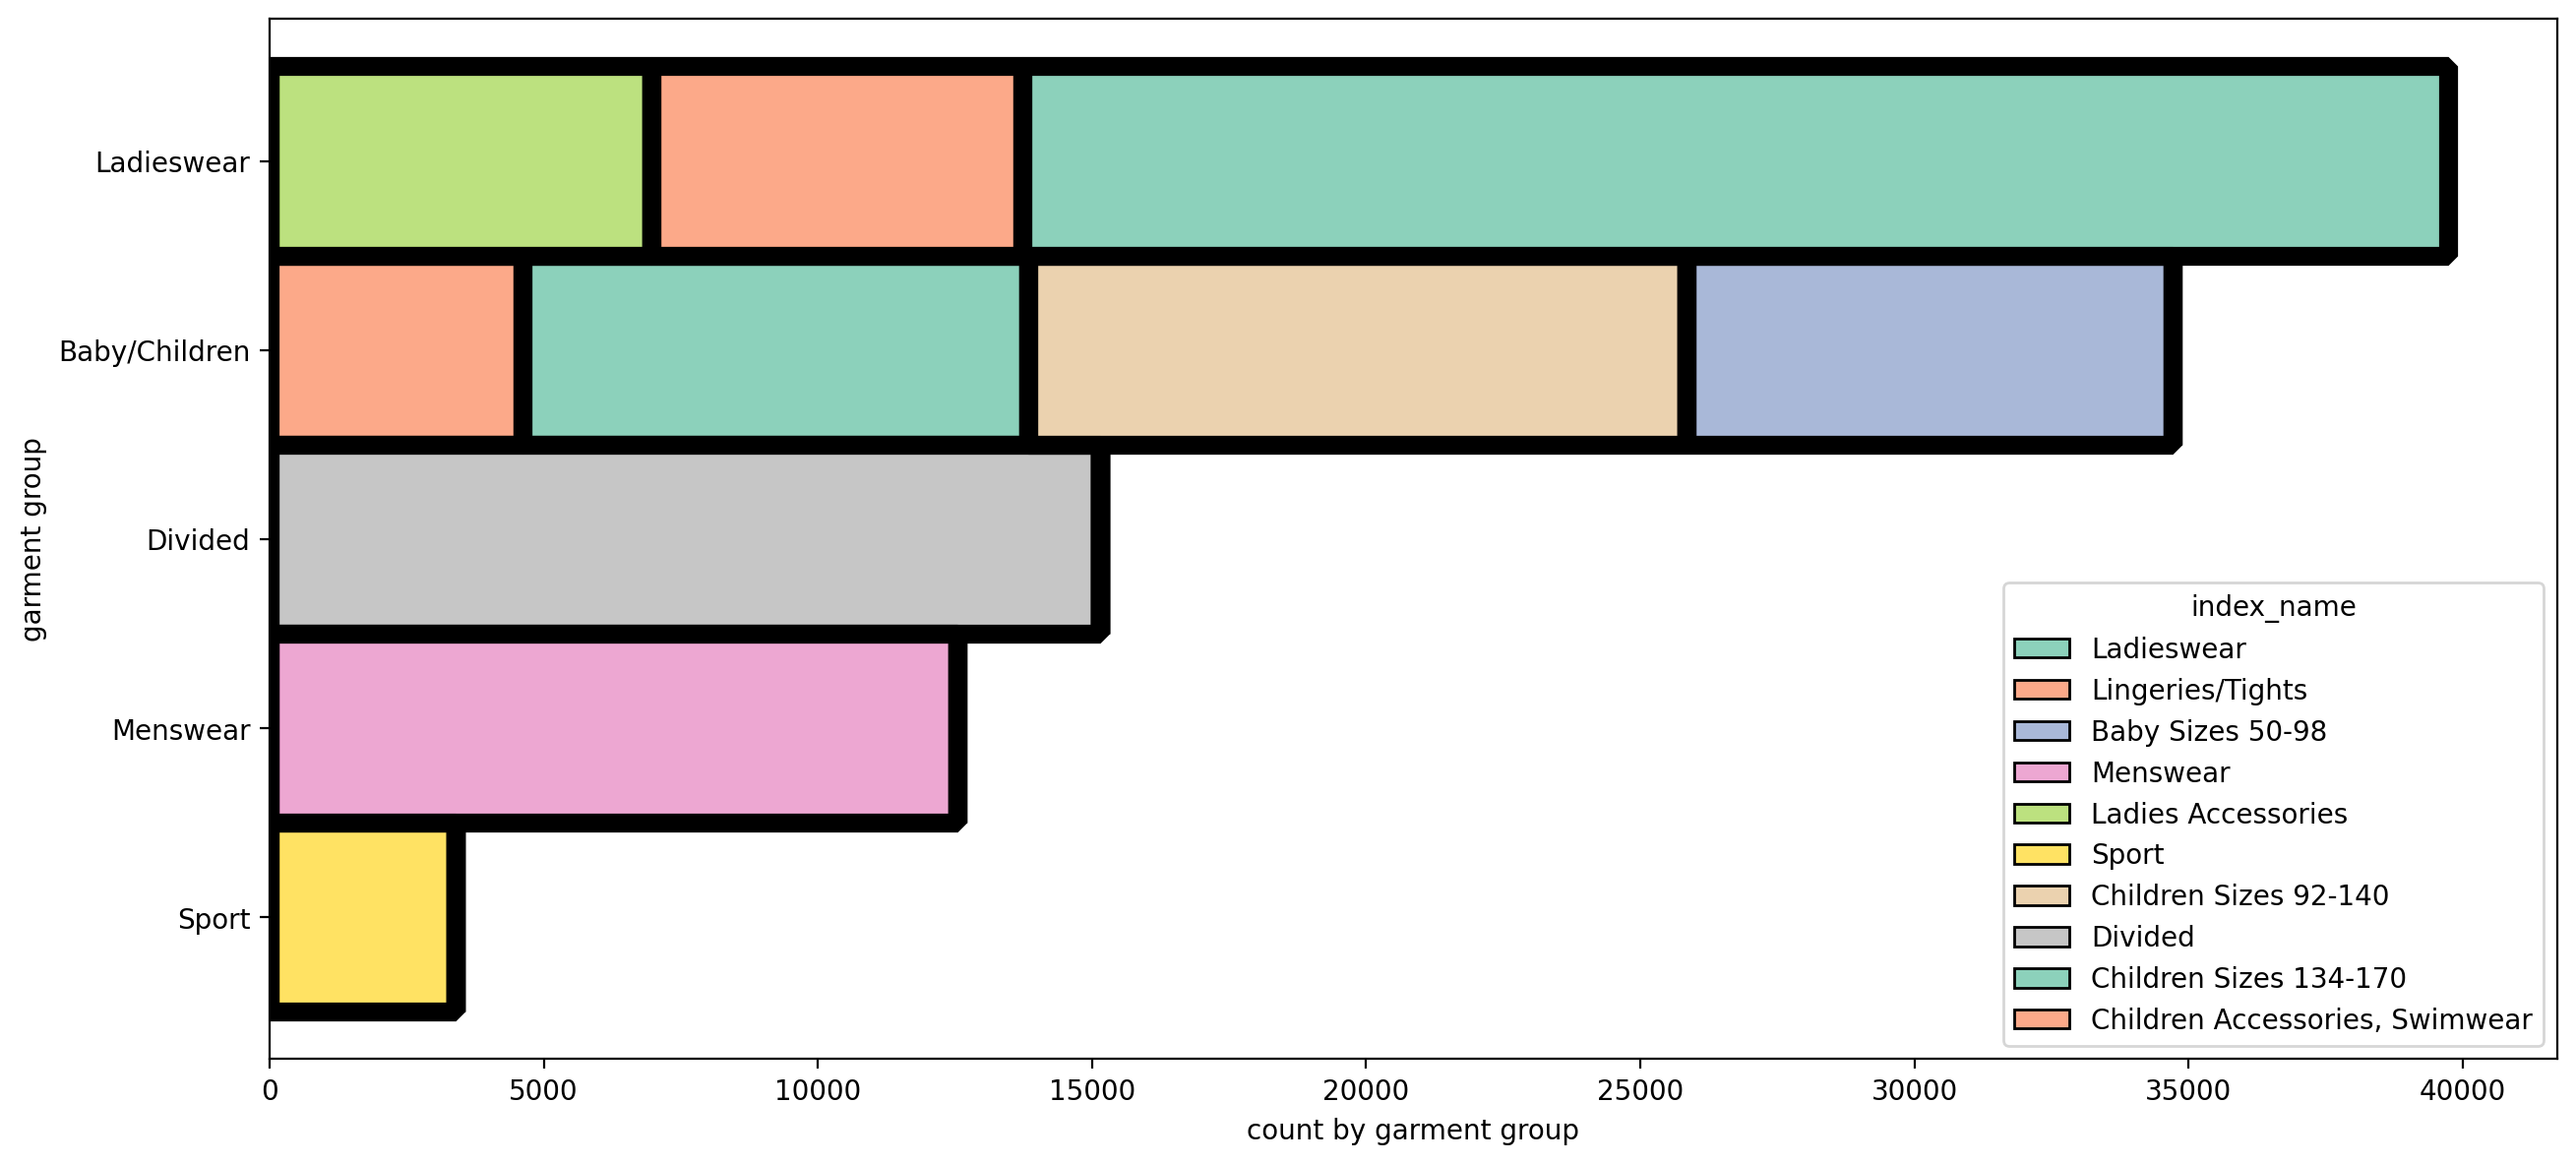

In [170]:
l = list(df['index_group_name'].value_counts().index)
df['index_group_name'] = pd.Categorical(df['index_group_name'], l)

f, ax = plt.subplots(figsize=(15, 7),dpi=200)
ax = sns.histplot(data=df, y='index_group_name', 
                  hue='index_name', multiple="stack", palette = 'Set2')
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

**Explaination**
1. Supplement for the second graph

## Take a closer look at each index_group

In [171]:
df.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Ladieswear        Baby Sizes 50-98                      0
                  Children Accessories, Swimwear        0
                  Children Sizes 134-170                0
                  Children Sizes 92-140                 0
                  Divided                               0
                  Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
                  Menswear                              0
                  Sport                                 0
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
                  Divided                               0
                  Ladies Accessories                    0
                  Ladie

In [172]:
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

# Draft below

In [173]:
# transactions = pd.read_csv('transactions_train.csv')
# transactions.nunique()

In [174]:
#customers = pd.read_csv('customers.csv')
#customers.nunique()

In [175]:
# import plotly.express as px
# order = df['index_name'].value_counts().index
# px.histogram(data_frame=df,y='index_group_name',color='index_name').update_xaxes(categoryorder='total ascending')